<a href="https://colab.research.google.com/github/dileepchepuri/eCommerce-Transactions-Dataset/blob/main/complete_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Customers.csv to Customers.csv


In [3]:
uploaded=files.upload()

Saving Products.csv to Products.csv


In [4]:
uploaded=files.upload()

Saving Transactions.csv to Transactions.csv


In [5]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [6]:
print(customers.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [7]:
print(products.head())

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [8]:
print(transactions.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [9]:
print(customers)

    CustomerID        CustomerName         Region  SignupDate
0        C0001    Lawrence Carroll  South America  2022-07-10
1        C0002      Elizabeth Lutz           Asia  2022-02-13
2        C0003      Michael Rivera  South America  2024-03-07
3        C0004  Kathleen Rodriguez  South America  2022-10-09
4        C0005         Laura Weber           Asia  2022-08-15
..         ...                 ...            ...         ...
195      C0196         Laura Watts         Europe  2022-06-07
196      C0197    Christina Harvey         Europe  2023-03-21
197      C0198         Rebecca Ray         Europe  2022-02-27
198      C0199      Andrea Jenkins         Europe  2022-12-03
199      C0200         Kelly Cross           Asia  2023-06-11

[200 rows x 4 columns]


Merged Dataset Overview:
                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.95000  
50%              

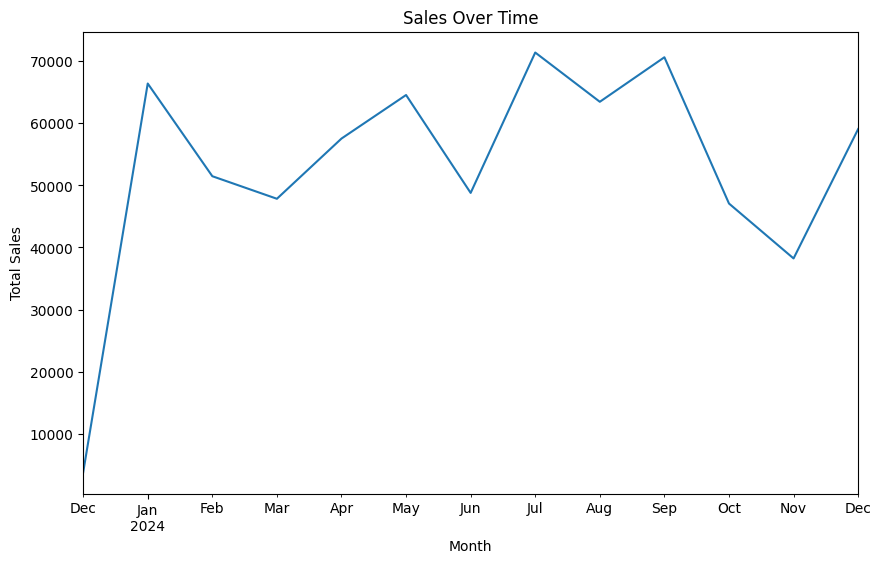

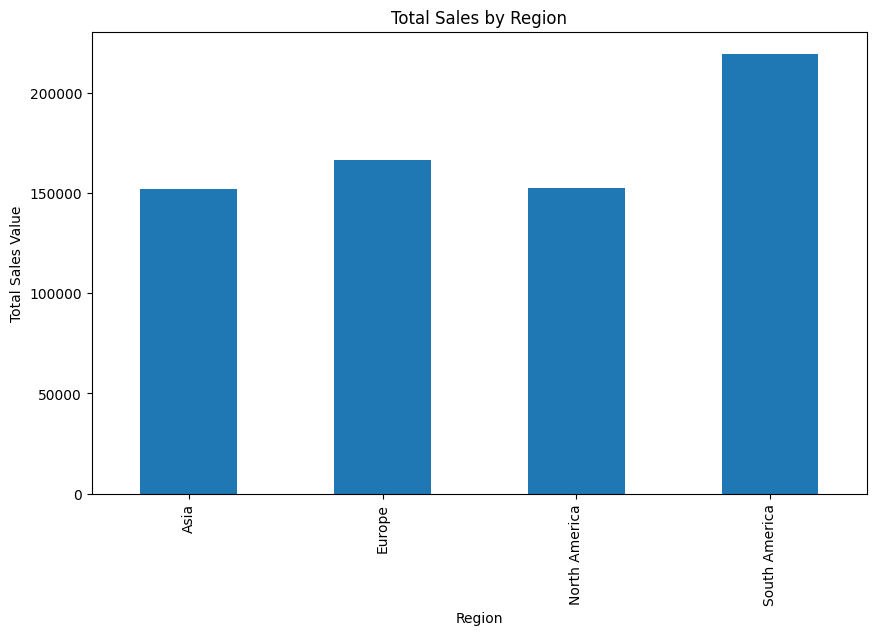

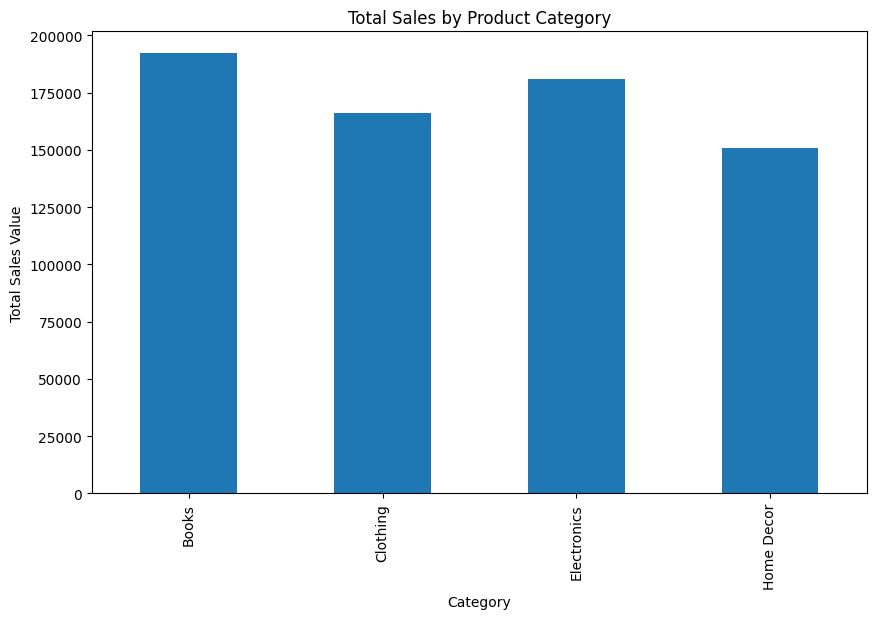

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Merge datasets for comprehensive analysis
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Convert date columns to datetime format
merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"])
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])

# --- Descriptive Statistics ---
print("Merged Dataset Overview:")
print(merged_data.describe())

# --- Missing Values ---
print("\nMissing values in datasets:")
print("Customers:", customers.isnull().sum())
print("Products:", products.isnull().sum())
print("Transactions:", transactions.isnull().sum())

# --- Sales Over Time ---
sales_by_month = merged_data.groupby(merged_data["TransactionDate"].dt.to_period("M"))["TotalValue"].sum()
sales_by_month.plot(kind="line", title="Sales Over Time", figsize=(10, 6))
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.savefig("Sales_Over_Time.png")
plt.show()

# --- Regional Sales ---
# Group by "Region" and calculate the sum of numeric columns only
region_sales = merged_data.groupby("Region")["TotalValue"].sum()
# Plot the bar chart
region_sales.plot(kind="bar", title="Total Sales by Region", figsize=(10, 6))
plt.xlabel("Region")
plt.ylabel("Total Sales Value")
# Save the plot as a PNG file
plt.savefig("Regional_Sales.png")
# Show the plot
plt.show()


# --- Top Product Categories ---
# Ensure that only numeric columns are summed
category_sales = merged_data.groupby("Category")[["TotalValue"]].sum()
# Plot the bar chart
category_sales.plot(kind="bar", title="Total Sales by Product Category", figsize=(10, 6), legend=False)
plt.xlabel("Category")
plt.ylabel("Total Sales Value")
# Save the plot as a PNG file
plt.savefig("Category_Sales.png")
# Show the plot
plt.show()



In [18]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Feature engineering
customer_features = merged_data.groupby("CustomerID").agg({
    "TotalValue": "sum",
    "Quantity": "sum",
    "ProductID": "nunique"
}).reset_index()
customer_features.rename(columns={"TotalValue": "TotalSpent", "ProductID": "UniqueProducts"}, inplace=True)

# Normalize features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(customer_features[["TotalSpent", "Quantity", "UniqueProducts"]])

# Compute similarity matrix
similarity_matrix = cosine_similarity(normalized_features)

# Get top 3 similar customers for each of the first 20 customers
recommendations = {}
for idx, customer_id in enumerate(customer_features["CustomerID"][:20]):
    similar_indices = similarity_matrix[idx].argsort()[-4:-1][::-1]  # Top 3 excluding self
    recommendations[customer_id] = [
        (customer_features.loc[i, "CustomerID"], round(similarity_matrix[idx, i], 2)) for i in similar_indices
    ]

# Save recommendations to CSV
recommendations_df = pd.DataFrame([
    {"CustomerID": cust, "Recommendations": recs} for cust, recs in recommendations.items()
])
recommendations_df.to_csv("Lookalike.csv", index=False)


Davies-Bouldin Index: 0.8956923630972515


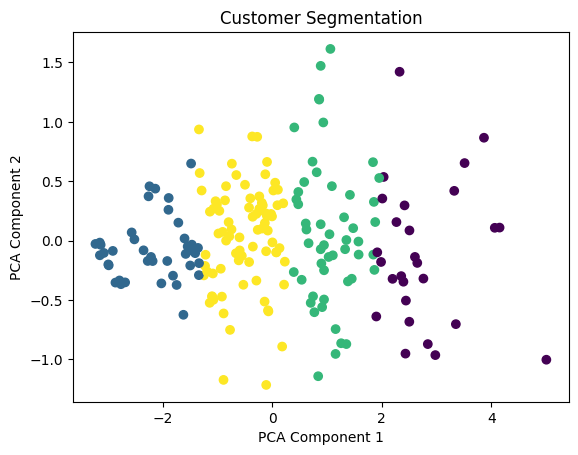

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(normalized_features)

# Evaluate clusters
db_index = davies_bouldin_score(normalized_features, clusters)
print(f"Davies-Bouldin Index: {db_index}")

# Visualize clusters
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_features)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap="viridis")
plt.title("Customer Segmentation")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.savefig("Customer_Segments.png")
plt.show()
